In [1]:
%matplotlib inline

%run -i 'CNN_Full.py' 

num_folds:  20  num_epochs:  20
Train Data Shape:  (56192, 1, 3000)   Test Data Shape:  (2048, 1, 3000)


__Train  W 9844  =>  271
__Train  N1 9842  =>  151
__Train  N2 16828  =>  889
__Train  N3 9844  =>  294
__Train  REM 9834  =>  443

Fold <1>
MLP..
There are 769280 (0.77 million) parameters in this neural network


ValueError: Expected target size (128, 5), got torch.Size([128])

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_CV_history(train_history_over_CV, val_history_over_CV):
        one_fold = np.copy(train_history_over_CV[0])
        num_epoch = len(one_fold)
        num_fold = len(train_history_over_CV)
        
        train = np.asarray(np.matrix(train_history_over_CV).mean(0)).reshape(-1)
        test = np.asarray(np.matrix(val_history_over_CV).mean(0)).reshape(-1)

        max_val = max(test)
        print("Epoch:", np.argmax(test), " max_acc=", max_val)

        plt.figure(figsize=(18, 6))
        plt.subplot(1, 2, 1)
        plt.plot(range(1, num_epoch + 1), train)
        plt.plot(range(1, num_epoch + 1), test)
        plt.legend(['Average Train Accuracy', 'Average Test Accuracy'], loc='upper right', prop={'size': 12})
        plt.suptitle('Cross Validation Performance', fontsize=15.0, y=1.08, fontweight='bold')
        plt.title('Best accuracy: '+'{0:.2f}'.format(max_val)+' % (epoch: '+str(np.argmax(test))+')', fontsize=13.0, y=1.08, fontweight='bold')
        plt.show()




Epoch: 3  max_acc= 78.04019817562443


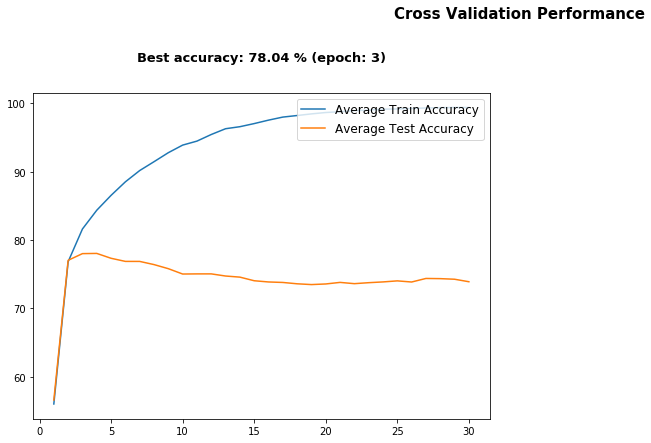

In [3]:
# SimplConv()

train = [[57.109552961275625, 76.67995444191345, 81.70202164009112, 84.69177107061503, 87.04619874715262, 88.97707858769932, 90.64279612756265, 91.92589692482915, 92.58435364464692, 94.14329441913439, 94.56328302961275, 95.4815632118451, 96.25925398633257, 96.79135820045558, 97.31456435079726, 97.77726366742597, 98.43394077448747, 98.69910307517085, 98.86104783599089, 99.19739464692483, 99.0692625284738, 99.27925683371298, 99.42162585421413, 99.3379840546697, 99.37357630979498, 99.31662870159454, 99.47145501138952, 99.39671127562643, 99.40560933940775, 99.33442482915717], [59.09156976744187, 77.85792151162791, 82.14571220930232, 84.81468023255813, 87.02398255813954, 89.43495639534885, 91.29360465116278, 92.48183139534883, 93.76998546511628, 94.92005813953487, 95.33248546511628, 96.30813953488372, 97.39643895348837, 98.0577761627907, 98.1795058139535, 98.60283430232558, 98.79723837209302, 98.92623546511628, 98.91533430232559, 99.05341569767442, 99.11882267441861, 99.30050872093024, 99.15879360465117, 99.20421511627907, 99.36773255813954, 99.44040697674419, 99.48037790697674, 99.53125, 99.50944767441861, 99.50036337209302], [58.64236111111111, 77.26215277777779, 82.03645833333333, 84.71354166666667, 86.99652777777777, 88.8420138888889, 90.34375, 91.51215277777777, 92.94444444444444, 93.53645833333334, 94.671875, 96.61284722222221, 96.16666666666667, 96.75520833333333, 97.68229166666667, 98.02430555555556, 98.69097222222221, 98.87847222222223, 98.73611111111111, 99.04513888888889, 99.19444444444444, 99.07118055555556, 99.19270833333333, 99.140625, 99.41319444444444, 99.28993055555554, 99.32118055555556, 99.36284722222221, 99.49479166666667, 99.42013888888889], [53.565886004514674, 75.08465011286681, 80.79676918735892, 83.42974040632055, 85.28322516930022, 87.10320259593679, 88.48934819413093, 90.10651805869074, 91.17875282167043, 92.01643623024832, 92.85411963882618, 93.55071952595937, 94.86985045146726, 94.53301354401806, 95.28604683972912, 95.6070118510158, 96.57872460496614, 96.65984762979683, 97.72679176072234, 98.38459367945825, 98.26290914221218, 98.90483916478556, 98.5309678329571, 98.85722347629797, 99.17289785553048, 99.03181433408578, 99.0141788939052, 99.05650395033861, 99.3122178329571, 99.21875], [55.06423611111111, 77.04861111111111, 82.19270833333333, 85.13020833333333, 87.57465277777777, 89.30208333333334, 91.33854166666666, 91.859375, 93.5295138888889, 95.66319444444444, 94.80381944444444, 95.65104166666667, 97.13020833333333, 96.99479166666667, 97.93055555555556, 97.63888888888889, 98.80555555555556, 98.67708333333334, 98.49652777777777, 98.71875, 99.08333333333333, 99.29861111111111, 99.3125, 99.31770833333333, 99.29166666666667, 99.40972222222221, 99.27083333333333, 99.31597222222223, 99.33506944444444, 99.39583333333334], [55.78723254504504, 76.03462837837837, 81.06876407657657, 83.62014358108108, 85.40259009009009, 87.01259853603604, 88.81791948198197, 90.31883445945947, 91.821509009009, 93.41216216216216, 94.36409065315316, 95.07847691441441, 95.96354166666666, 97.30081644144144, 96.83452984234235, 97.87267736486487, 98.10670045045045, 98.91082488738738, 98.43398085585585, 98.61697635135135, 98.7841356981982, 98.93193975225225, 98.69087837837837, 99.07446509009009, 99.25218186936937, 99.35951576576578, 99.36479448198197, 99.26097972972973, 99.3190456081081, 99.20115427927928], [52.41046348314606, 76.65730337078651, 81.52387640449437, 84.55582865168539, 86.70470505617978, 88.6183286516854, 90.43890449438202, 91.4255617977528, 92.93890449438203, 94.49613764044943, 94.22928370786516, 94.77703651685393, 95.70751404494382, 96.36587078651685, 96.99789325842697, 96.79073033707866, 97.3630617977528, 97.99683988764045, 98.1320224719101, 98.70786516853933, 98.51825842696628, 98.56917134831461, 98.91502808988764, 99.19768258426967, 99.10287921348313, 99.22050561797752, 99.36973314606742, 99.3065308988764, 99.30828651685393, 99.32584269662922], [55.080746644295296, 76.39471476510067, 81.25873881431768, 84.07438478747203, 86.49503635346755, 88.10123042505593, 89.72664988814317, 91.21749161073825, 92.65764821029083, 93.57522371364652, 94.44735738255034, 95.56417785234899, 95.88227069351231, 96.12346196868009, 96.63380872483222, 97.42204977628636, 98.10717281879194, 97.79607102908278, 98.28894015659955, 99.03523489932886, 99.07019015659955, 98.9967841163311, 99.26069630872483, 99.00552293064877, 98.98804530201343, 99.2537052572707, 99.34633668903803, 99.3847874720358, 99.4057606263982, 99.42673378076063], [54.52670581655481, 76.05564876957494, 81.0280341163311, 83.66540827740492, 85.8064177852349, 88.02782438478746, 89.59207214765101, 90.59179250559284, 92.97748881431768, 93.73077460850112, 94.24811241610739, 95.84731543624162, 97.29970637583892, 96.36989653243847, 96.26328299776287, 96.85752237136465, 97.55837527964206, 97.77335011185683, 98.53013143176734, 97.93239653243847, 98.53887024608501, 98.81676454138703, 99.02999161073825, 98.9565855704698, 98.78006152125279, 99.3498322147651, 99.10864093959731, 99.44945469798657, 99.41100391498881, 99.34109340044742], [55.797151548672566, 77.5477046460177, 82.28187223451327, 84.93673949115043, 87.04542311946902, 88.92249723451327, 90.711421460177, 92.4433075221239, 93.52184734513274, 94.5917450221239, 94.87520741150442, 95.48879977876106, 96.46190542035397, 96.95450774336283, 97.96563882743364, 98.43922842920354, 98.18687776548673, 98.85059457964603, 98.5809596238938, 98.49453816371681, 98.5498478982301, 98.81256913716814, 99.305171460177, 99.35011061946902, 99.52986725663717, 99.38813606194691, 99.4451742256637, 99.53678097345133, 99.51431139380531, 99.54196626106194], [58.44640899122807, 78.99705317982456, 82.6771518640351, 85.1648163377193, 87.03570449561403, 89.19270833333334, 90.8751370614035, 92.3742461622807, 93.60437225877193, 94.4250274122807, 95.67399945175438, 96.04235197368422, 96.82188870614034, 97.53118146929825, 97.8892543859649, 98.36040296052632, 98.70990953947368, 98.94976699561403, 99.18962445175438, 99.28556743421053, 99.25815515350878, 99.2273163377193, 99.20333059210526, 99.39692982456141, 99.43462171052632, 99.53570449561403, 99.50143914473685, 99.45004111842105, 99.49801260964912, 99.51514528508771], [55.87984054669703, 76.0499715261959, 81.5632118451025, 84.5440632118451, 87.06399487471526, 88.66030751708428, 91.02185364464692, 92.21953302961275, 93.51865034168566, 94.29456150341686, 94.8248861047836, 95.70045558086561, 96.96042141230068, 97.17397494305239, 97.44625569476082, 98.17767653758543, 98.74715261958997, 98.41792425968109, 98.84147209567197, 98.61368166287015, 99.06392369020502, 98.9001993166287, 98.82011674259681, 99.32730637813212, 99.26679954441914, 99.31840831435079, 99.38069476082005, 99.38603359908885, 99.3628986332574, 99.34510250569475], [56.22707392776524, 76.9381348758465, 81.78611738148985, 84.38029063205418, 86.62175507900677, 88.48934819413093, 89.67444977426636, 90.80311794582393, 92.41147009029346, 93.36202031602708, 93.61420711060948, 94.42191027088036, 97.10778781038375, 95.35306151241535, 95.80452878103839, 96.87676354401806, 96.7638967268623, 97.45696952595937, 97.55925507900677, 98.55036681715575, 98.04422968397292, 98.48335214446952, 98.54331264108353, 98.67734198645599, 98.68263261851015, 99.12351862302484, 99.25754796839729, 99.28752821670429, 99.28223758465012, 99.35806997742664], [54.785374720357936, 76.48385067114094, 81.34962248322147, 84.03243847874721, 86.21015100671141, 87.84256152125279, 89.21805089485458, 90.50789988814317, 92.23468959731544, 93.6294043624161, 94.08032718120806, 96.61633109619687, 95.55369127516778, 96.1444351230425, 96.04830816554811, 97.04977628635348, 97.51817673378076, 97.48147371364652, 98.009298098434, 98.0442533557047, 98.20155201342283, 98.64198825503355, 99.06145134228188, 98.88842281879194, 98.9163870246085, 99.05970357941834, 98.92512583892618, 99.19602908277405, 99.22923657718121, 99.30264261744966], [58.25968608597285, 78.32649886877829, 82.37415158371041, 85.01661481900452, 87.07755938914026, 89.36828337104072, 91.31787330316742, 92.62054581447964, 93.26923076923077, 94.74335407239819, 95.3672935520362, 95.71726527149322, 96.61870757918552, 97.10301187782805, 97.930217760181, 97.97263857466064, 98.57890271493213, 98.60364819004525, 98.7556561085973, 99.04199660633483, 98.95538744343891, 98.93594457013575, 99.31242929864254, 99.21344739819004, 99.30182409502262, 99.29652149321268, 99.38136312217195, 99.45736708144797, 99.36722285067874, 99.48741515837104], [56.610039149888145, 77.07284675615213, 81.58382270693512, 84.40296420581656, 86.34647651006712, 88.62381152125279, 89.82452460850112, 91.48839485458613, 92.62968400447427, 93.8006851230425, 94.33899608501119, 95.80886465324386, 96.26328299776287, 96.6180788590604, 97.14590324384787, 96.81208053691275, 97.20882270693512, 98.37108501118567, 98.92512583892618, 98.7188898210291, 98.84647651006712, 98.94435123042506, 99.06669463087249, 99.33759787472036, 99.4005173378076, 99.40226510067114, 99.46693232662193, 99.37954418344519, 99.41624720357942, 99.23273210290827], [53.22788783482143, 74.84479631696429, 80.42340959821429, 83.19789341517857, 85.33238002232143, 87.54185267857143, 88.84974888392857, 89.66936383928571, 90.84298270089286, 91.95382254464286, 93.01234654017857, 93.37158203125, 93.82672991071429, 94.95500837053571, 95.60546875, 96.55064174107143, 96.1181640625, 96.09723772321429, 97.23423549107143, 97.74518694196429, 98.44621930803571, 98.63455636160714, 98.52469308035714, 99.20131138392857, 98.97112165178571, 98.86823381696429, 99.08447265625, 99.27106584821429, 99.21526227678571, 99.20828683035714], [56.47245159453303, 77.44162870159454, 81.85150911161732, 84.63304384965832, 86.91450740318906, 89.18351366742597, 90.89016230068337, 92.33342824601367, 93.3816201594533, 93.90482630979498, 94.93344248291572, 95.80367312072893, 96.26459282460137, 97.10634965831434, 97.12058656036446, 97.98369874715262, 98.72935649202734, 98.53537870159454, 98.64393507972665, 98.98917995444191, 99.22230922551253, 99.15646355353076, 99.07104214123007, 99.41094817767654, 99.41450740318906, 99.3682374715262, 99.51060649202734, 99.49281036446469, 99.52306378132118, 99.4821326879271], [55.13267173423423, 76.72086148648648, 81.00541948198197, 83.50929054054053, 85.75274493243244, 87.71290822072072, 89.282446509009, 90.5247043918919, 91.9288429054054, 92.54821227477478, 94.03681024774775, 94.87436655405406, 96.38583896396396, 96.37000281531532, 96.67264921171171, 97.55419481981981, 97.79525619369369, 98.00816441441441, 98.09790259009009, 97.88851351351352, 98.27034065315316, 98.75774211711712, 98.5061233108108, 98.64336993243244, 98.69087837837837, 98.75246340090091, 99.35423704954955, 99.29265202702703, 99.4017454954955, 99.51787725225225], [58.30164546460177, 77.02053373893806, 81.63716814159292, 84.59278207964603, 86.91060564159292, 89.26472621681415, 90.84796736725663, 92.63170630530973, 93.69123340707965, 94.84409568584071, 95.01866703539822, 95.9157217920354, 96.59153761061947, 96.85080199115043, 97.82390763274337, 98.2767560840708, 98.76244469026548, 99.07010508849558, 98.96467090707965, 98.89380530973452, 98.73651825221239, 98.80738384955751, 99.03553650442478, 99.1668971238938, 99.05973451327434, 99.08220409292035, 99.1496128318584, 99.3535674778761, 99.40023506637168, 99.46937223451327]]
test = [[59.423828125, 79.19921875, 79.4921875, 79.541015625, 78.515625, 77.783203125, 76.46484375, 73.92578125, 71.484375, 70.263671875, 72.16796875, 72.314453125, 73.046875, 72.36328125, 74.4140625, 75.634765625, 75.5859375, 75.732421875, 74.951171875, 74.4140625, 71.6796875, 69.23828125, 73.4375, 73.6328125, 75.68359375, 74.8046875, 75.439453125, 75.87890625, 76.708984375, 75.390625], [32.1875, 51.45833333333333, 54.6875, 55.46875, 54.63541666666667, 54.322916666666664, 55.00000000000001, 57.604166666666664, 57.70833333333333, 56.09375, 56.09375, 54.73958333333333, 55.260416666666664, 55.78125000000001, 56.71874999999999, 56.614583333333336, 54.63541666666667, 55.36458333333333, 55.989583333333336, 55.93749999999999, 55.78125000000001, 54.895833333333336, 55.625, 53.75, 54.01041666666667, 54.63541666666667, 53.85416666666667, 54.79166666666667, 55.677083333333336, 53.95833333333333], [47.96875, 73.54166666666667, 75.15625, 75.10416666666667, 74.58333333333333, 71.5625, 70.9375, 70.15625, 71.5625, 71.5625, 71.35416666666666, 72.34375, 72.60416666666667, 72.8125, 71.30208333333333, 73.85416666666667, 70.88541666666667, 70.98958333333333, 70.46875, 70.05208333333334, 70.41666666666667, 71.09375, 71.25, 70.46875, 70.67708333333333, 71.30208333333333, 71.40625, 71.35416666666666, 72.08333333333333, 69.375], [61.532738095238095, 82.36607142857143, 83.77976190476191, 83.81696428571429, 84.00297619047619, 83.55654761904762, 82.92410714285714, 83.29613095238095, 82.88690476190477, 81.95684523809523, 82.21726190476191, 82.36607142857143, 81.88244047619048, 80.65476190476191, 81.06398809523809, 80.35714285714286, 79.61309523809523, 79.38988095238095, 79.53869047619048, 79.72470238095238, 80.80357142857143, 79.42708333333334, 79.53869047619048, 79.12946428571429, 79.6875, 79.87351190476191, 80.20833333333334, 79.83630952380952, 77.75297619047619, 79.91071428571429], [60.888671875, 77.294921875, 77.685546875, 77.880859375, 76.85546875, 76.806640625, 76.220703125, 75.390625, 74.8046875, 74.51171875, 75.634765625, 73.974609375, 72.8515625, 74.365234375, 73.2421875, 74.560546875, 73.291015625, 74.12109375, 73.6328125, 72.75390625, 72.36328125, 72.8515625, 71.826171875, 73.828125, 71.630859375, 70.458984375, 73.876953125, 74.31640625, 73.974609375, 73.193359375], [73.93973214285714, 83.48214285714286, 83.76116071428571, 83.70535714285714, 83.92857142857143, 84.04017857142857, 83.53794642857143, 82.08705357142857, 80.80357142857143, 80.46875, 81.25, 81.36160714285714, 80.35714285714286, 77.67857142857143, 79.52008928571429, 77.95758928571429, 79.18526785714286, 79.96651785714286, 78.62723214285714, 78.96205357142857, 79.91071428571429, 79.35267857142857, 78.45982142857143, 80.02232142857143, 80.58035714285714, 80.18973214285714, 80.24553571428571, 79.74330357142857, 80.52455357142857, 79.57589285714286], [61.90257352941176, 79.04411764705883, 80.00919117647058, 80.37683823529412, 76.97610294117648, 77.75735294117648, 77.94117647058823, 78.17095588235294, 78.125, 78.72242647058823, 77.61948529411765, 76.97610294117648, 76.97610294117648, 76.10294117647058, 77.11397058823529, 77.34375, 78.07904411764706, 76.70036764705883, 77.15992647058823, 77.84926470588235, 76.97610294117648, 76.01102941176471, 76.60845588235294, 76.47058823529412, 77.25183823529412, 75.18382352941177, 76.01102941176471, 76.10294117647058, 75.22977941176471, 75.04595588235294], [59.84374999999999, 77.44791666666667, 79.73958333333333, 79.94791666666666, 80.83333333333333, 78.90625, 78.69791666666667, 78.28125, 77.76041666666667, 75.0, 76.5625, 76.51041666666667, 75.52083333333334, 77.91666666666667, 77.60416666666666, 77.13541666666667, 76.61458333333333, 76.04166666666666, 77.08333333333334, 75.3125, 77.86458333333334, 77.29166666666667, 77.29166666666667, 77.08333333333334, 75.98958333333333, 76.5625, 76.09375, 75.78125, 75.3125, 74.89583333333333], [47.377232142857146, 80.13392857142857, 81.47321428571429, 82.75669642857143, 82.14285714285714, 80.859375, 81.52901785714286, 81.08258928571429, 80.13392857142857, 79.74330357142857, 79.96651785714286, 79.63169642857143, 78.96205357142857, 77.79017857142857, 79.63169642857143, 80.46875, 80.18973214285714, 78.125, 78.06919642857143, 76.22767857142857, 75.50223214285714, 79.52008928571429, 78.57142857142857, 77.79017857142857, 77.51116071428571, 76.171875, 79.24107142857143, 77.95758928571429, 79.96651785714286, 79.46428571428571], [55.677083333333336, 69.73958333333333, 71.19791666666667, 71.40625, 71.09375, 69.42708333333333, 69.01041666666666, 68.48958333333334, 67.13541666666667, 66.09375, 65.41666666666667, 63.697916666666664, 64.11458333333333, 64.58333333333334, 64.47916666666667, 63.489583333333336, 61.979166666666664, 63.541666666666664, 64.6875, 63.489583333333336, 65.15625, 65.67708333333333, 63.74999999999999, 65.05208333333333, 63.74999999999999, 64.27083333333333, 64.63541666666667, 64.32291666666666, 64.0625, 64.375], [47.20052083333333, 76.10677083333334, 79.03645833333334, 79.296875, 74.15364583333334, 75.45572916666666, 73.828125, 72.8515625, 71.875, 69.3359375, 72.0703125, 74.93489583333334, 75.06510416666666, 71.2890625, 69.27083333333334, 68.81510416666666, 69.98697916666666, 67.64322916666666, 67.05729166666666, 68.29427083333334, 65.69010416666666, 63.4765625, 67.64322916666666, 69.98697916666666, 70.37760416666666, 69.85677083333334, 71.61458333333334, 71.54947916666666, 71.80989583333334, 70.18229166666666], [52.1875, 77.96875, 78.38541666666666, 79.01041666666667, 77.65625, 76.04166666666666, 77.5, 76.82291666666666, 76.77083333333333, 74.16666666666667, 73.64583333333333, 75.46875, 75.41666666666667, 75.46875, 74.27083333333333, 75.41666666666667, 75.15625, 73.48958333333333, 72.55208333333333, 74.375, 74.53125, 72.29166666666667, 70.9375, 69.01041666666666, 74.6875, 75.46875, 72.44791666666667, 72.91666666666666, 73.125, 75.10416666666667], [42.466517857142854, 78.06919642857143, 78.29241071428571, 77.06473214285714, 76.5625, 75.78125, 74.55357142857143, 74.55357142857143, 74.94419642857143, 73.71651785714286, 71.03794642857143, 73.21428571428571, 72.54464285714286, 74.33035714285714, 71.37276785714286, 70.703125, 68.08035714285714, 71.54017857142857, 71.59598214285714, 72.15401785714286, 77.06473214285714, 76.22767857142857, 75.78125, 75.78125, 75.0, 74.66517857142857, 74.94419642857143, 74.609375, 75.22321428571429, 74.55357142857143], [60.78125, 70.46875, 66.77083333333333, 64.84375, 65.72916666666667, 70.625, 72.39583333333334, 71.82291666666667, 71.92708333333333, 70.88541666666667, 69.73958333333333, 69.01041666666666, 68.22916666666666, 68.90625, 67.8125, 66.875, 68.38541666666667, 67.76041666666667, 66.35416666666667, 65.20833333333333, 67.86458333333333, 68.90625, 69.6875, 69.27083333333334, 69.42708333333333, 68.69791666666667, 69.375, 69.58333333333333, 68.48958333333334, 68.28125], [47.65625, 82.19866071428571, 83.64955357142857, 83.76116071428571, 82.97991071428571, 82.08705357142857, 81.13839285714286, 79.63169642857143, 78.40401785714286, 78.85044642857143, 78.62723214285714, 77.56696428571429, 78.85044642857143, 79.6875, 79.57589285714286, 78.125, 78.45982142857143, 77.45535714285714, 77.84598214285714, 78.57142857142857, 77.90178571428571, 78.45982142857143, 78.68303571428571, 79.40848214285714, 78.34821428571429, 78.79464285714286, 79.18526785714286, 78.23660714285714, 78.79464285714286, 77.79017857142857], [67.138671875, 82.080078125, 83.251953125, 82.6171875, 81.982421875, 79.931640625, 79.443359375, 79.833984375, 80.078125, 79.8828125, 80.712890625, 80.2734375, 79.443359375, 77.34375, 76.26953125, 72.998046875, 75.537109375, 75.78125, 76.708984375, 76.85546875, 76.806640625, 75.732421875, 76.7578125, 78.125, 76.904296875, 76.611328125, 75.68359375, 76.611328125, 76.07421875, 75.537109375], [71.2890625, 82.91015625, 83.349609375, 83.251953125, 83.056640625, 82.861328125, 84.228515625, 83.10546875, 82.8125, 80.908203125, 79.736328125, 80.2734375, 80.95703125, 81.0546875, 79.052734375, 76.611328125, 79.296875, 80.17578125, 79.638671875, 79.248046875, 78.02734375, 78.857421875, 77.63671875, 77.294921875, 78.02734375, 77.783203125, 78.955078125, 78.759765625, 79.345703125, 78.125], [52.43055555555556, 78.08159722222221, 77.95138888888889, 78.21180555555556, 78.47222222222221, 77.03993055555556, 77.60416666666666, 79.42708333333334, 77.08333333333334, 76.5625, 77.82118055555556, 75.73784722222221, 74.30555555555556, 76.82291666666666, 73.74131944444444, 76.47569444444444, 75.99826388888889, 74.43576388888889, 75.08680555555556, 75.52083333333334, 76.43229166666666, 76.43229166666666, 75.95486111111111, 75.21701388888889, 74.86979166666666, 75.86805555555556, 75.56423611111111, 76.30208333333334, 75.390625, 76.51909722222221], [76.28676470588235, 84.09926470588235, 83.91544117647058, 82.85845588235294, 82.03125, 81.75551470588235, 82.99632352941177, 82.49080882352942, 81.15808823529412, 82.30698529411765, 81.98529411764706, 82.03125, 82.8125, 81.98529411764706, 81.75551470588235, 81.11213235294117, 81.66360294117648, 81.52573529411765, 80.05514705882352, 81.29595588235294, 81.34191176470588, 81.38786764705883, 80.65257352941177, 80.51470588235294, 80.79044117647058, 79.59558823529412, 81.43382352941177, 81.02022058823529, 80.65257352941177, 79.73345588235294], [53.7109375, 75.0, 78.61328125, 79.8828125, 80.37109375, 80.859375, 81.4453125, 79.1015625, 78.7109375, 79.4921875, 77.24609375, 78.515625, 75.48828125, 74.51171875, 72.65625, 72.75390625, 73.2421875, 72.16796875, 72.55859375, 75.1953125, 73.92578125, 75.1953125, 75.09765625, 75.5859375, 75.29296875, 76.3671875, 77.34375, 77.34375, 75.09765625, 76.953125]]

plot_CV_history(train, test)


Epoch: 7  max_acc= 78.54995559421685


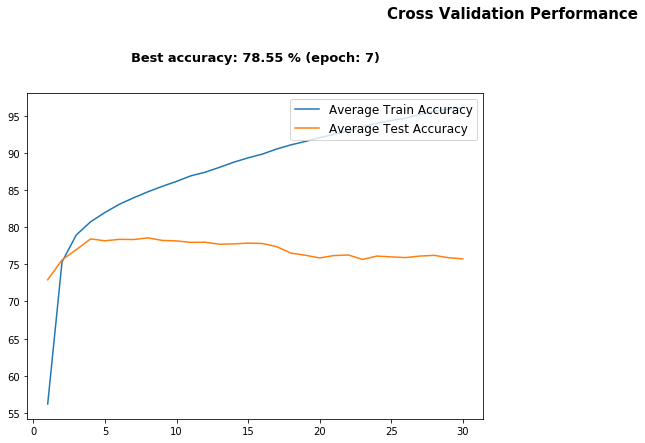

In [4]:
# SimplConvBest()

train = [[55.76594533029613, 76.12293564920274, 79.00590831435079, 80.62535592255125, 81.96540432801822, 83.18799829157174, 84.19881833712985, 84.98540717539863, 85.88945045558086, 86.58349943052391, 87.04619874715262, 87.56050683371298, 88.23675968109339, 89.68002562642369, 89.77078587699316, 90.30289009111617, 90.83677391799544, 91.48811218678816, 91.96504840546697, 93.05239179954442, 92.84595671981776, 93.4563638952164, 94.42091400911163, 94.99572892938497, 94.61667141230068, 95.17546981776765, 95.19148633257403, 96.15247722095673, 96.34111617312074, 96.42297835990888], [51.12281976744186, 74.1842296511628, 78.34665697674419, 80.06177325581395, 81.32085755813954, 82.55813953488372, 83.45748546511628, 84.1751453488372, 84.84920058139535, 85.43968023255813, 86.10828488372093, 86.54978197674419, 87.39825581395348, 88.43204941860465, 88.70276162790698, 89.34411337209302, 89.53125, 89.75290697674419, 90.58321220930232, 90.55595930232559, 91.78052325581395, 91.47710755813954, 92.28015988372093, 92.29469476744187, 93.05959302325581, 93.56468023255815, 93.86082848837209, 94.00617732558139, 94.5421511627907, 94.76199127906978], [55.16840277777778, 73.89930555555554, 77.98958333333333, 79.99131944444444, 81.37152777777777, 82.65104166666667, 83.62847222222223, 84.46875, 85.23611111111111, 85.95659722222221, 86.30034722222221, 86.48958333333333, 87.30034722222221, 88.22222222222223, 88.94444444444444, 89.17534722222223, 89.55555555555556, 91.02430555555556, 90.49131944444444, 90.83680555555556, 91.81597222222221, 92.046875, 92.74479166666667, 92.63020833333333, 92.99826388888889, 93.29340277777777, 94.23611111111111, 95.06423611111111, 94.55555555555556, 95.01736111111111], [56.73497460496614, 75.4867381489842, 79.0173532731377, 80.65039503386005, 81.75261004514672, 82.7313769751693, 83.40328724604966, 84.1404486455982, 84.87231941309255, 85.49132336343115, 86.15794300225733, 86.70287810383746, 88.23716139954854, 88.00084650112868, 89.38699209932281, 89.60390801354401, 90.03773984198645, 91.4274125282167, 92.00585496613995, 92.8276664785553, 93.12570541760722, 93.67769469525959, 94.04803893905192, 94.82223476297969, 94.74816591422122, 94.79930869074492, 95.38480530474041, 96.28244920993228, 96.59812358916479, 96.58754232505643], [56.01215277777778, 76.09548611111111, 79.05034722222221, 80.81944444444444, 82.10763888888889, 83.32118055555556, 84.22048611111111, 85.02083333333333, 85.671875, 86.40798611111111, 87.09027777777779, 87.74131944444444, 88.359375, 88.80208333333334, 89.33680555555556, 90.328125, 91.07986111111111, 91.5625, 92.16319444444444, 92.58680555555556, 92.84027777777779, 93.47743055555556, 94.19097222222223, 94.03993055555556, 95.18923611111111, 95.30381944444444, 95.57465277777779, 96.09027777777777, 96.26736111111111, 96.75868055555556], [56.74268018018018, 76.17715371621621, 78.74788851351352, 80.37725225225225, 81.4893018018018, 82.53272804054053, 83.30166103603604, 83.95094313063063, 84.9609375, 85.4201858108108, 86.34396114864865, 86.63780968468468, 87.09529842342343, 87.67947635135135, 88.02787162162163, 88.67011542792793, 89.50415259009009, 89.64139921171171, 90.11824324324324, 91.02442286036036, 91.64379222972973, 91.98338963963964, 92.1558277027027, 93.20277308558559, 93.3910472972973, 93.52125563063063, 94.17933558558559, 94.10367398648648, 94.9904983108108, 95.03976632882883], [53.5814606741573, 73.48841292134831, 77.58602528089888, 79.82268258426967, 81.16046348314607, 82.15589887640449, 82.99157303370787, 83.66046348314606, 84.39255617977528, 85.14922752808988, 85.89712078651685, 86.60287921348313, 87.32619382022472, 87.99508426966293, 88.13728932584269, 88.95365168539325, 89.34339887640449, 89.94030898876404, 90.72155898876404, 90.56004213483146, 91.52738764044945, 91.73630617977528, 92.3999297752809, 92.90905898876404, 93.08637640449439, 93.95365168539325, 94.03265449438202, 95.74789325842697, 94.41362359550561, 95.17380617977528], [55.994826621923934, 74.64869966442953, 79.259298098434, 80.5893456375839, 81.88269015659955, 82.97154642058166, 83.77202181208054, 84.47462248322147, 85.16673657718121, 85.96546420581656, 86.77118288590604, 87.49300894854586, 87.83382270693512, 88.43854865771812, 89.0974552572707, 90.0150307606264, 89.50643176733782, 90.62325223713647, 90.98329138702461, 91.16680648769575, 91.86591163310962, 92.47238534675614, 93.2256711409396, 94.34598713646533, 94.13276006711409, 94.20616610738254, 95.54670022371364, 95.02237136465325, 95.69700782997764, 96.15142617449665], [57.207774049216994, 77.55348154362416, 80.16988255033557, 81.66596756152126, 82.92610458612975, 83.96252796420582, 84.84514821029083, 85.63338926174497, 86.05110458612975, 86.96693232662193, 87.86178691275168, 88.52069351230425, 89.64800055928411, 89.24776286353467, 90.41701621923937, 91.40450223713647, 91.69113534675614, 92.57899888143176, 93.17323825503355, 93.64163870246085, 94.05411073825503, 94.56445749440716, 95.01363255033557, 95.40687919463086, 95.82459451901566, 95.73021532438479, 96.1898769574944, 96.18463366890381, 96.65128635346755, 96.5726370246085], [58.88239767699115, 74.87555309734513, 79.55095409292035, 81.15320796460178, 82.37693584070797, 83.42090707964603, 84.32660398230088, 85.19427544247787, 85.67650719026548, 86.36615044247787, 86.92961836283186, 87.44123340707965, 87.99260232300885, 88.83434734513274, 89.68473451327434, 90.2948700221239, 90.79784292035397, 91.1798257743363, 91.93342090707965, 92.23243915929203, 92.79590707964603, 93.359375, 93.7413578539823, 94.19074944690266, 94.84409568584071, 95.71003871681415, 95.53719579646017, 95.91399336283186, 96.00905696902655, 96.56388274336283], [59.66796875, 76.66700932017544, 79.67208059210526, 81.42304002192982, 82.59320175438597, 83.6194490131579, 84.47436951754386, 85.39782072368422, 86.27501370614034, 86.91920230263158, 87.58052357456141, 88.18702028508771, 88.51768092105263, 89.63130482456141, 89.89000822368422, 90.48279879385966, 91.13384046052632, 91.6563870614035, 92.20120614035088, 92.18064692982456, 93.21032072368422, 93.25657894736842, 94.31880482456141, 95.06578947368422, 95.20799067982456, 95.01267817982456, 95.45127467105263, 96.07319078947368, 96.30790844298247, 96.7173793859649], [56.513382687927106, 74.83627562642369, 78.21576025056947, 80.23384111617312, 81.67176822323462, 82.64165717539863, 83.43002562642369, 84.40169419134396, 85.11887813211845, 85.61183086560365, 86.04783599088837, 86.65112471526196, 87.28644646924829, 87.89329441913439, 88.2314208428246, 89.0678388382688, 89.85976651480638, 90.57695045558086, 90.968465261959, 91.82089977220956, 91.844034738041, 92.47757687927107, 93.49195615034168, 92.91002277904327, 93.5061930523918, 94.05609339407745, 94.65226366742597, 94.89607061503416, 95.67020216400911, 95.97629555808655], [59.729472347629795, 74.87831546275395, 79.39827878103839, 80.93961625282166, 82.33457957110609, 83.36977990970654, 84.28858634311513, 85.14566873589165, 85.91281038374717, 86.67466139954854, 87.13494638826185, 87.68340857787811, 88.36060948081264, 89.24943566591422, 89.48575056433408, 90.02892212189616, 91.23342268623024, 91.39037810383746, 91.55615124153499, 92.18397291196389, 93.09396162528216, 93.36025677200904, 93.4678329571106, 94.50479683972912, 95.22961343115124, 95.35482505643341, 95.45534706546276, 95.82216422121897, 96.29655756207674, 96.51170993227991], [58.571029082774054, 75.32857941834452, 78.6790408277405, 80.68022930648769, 82.09766498881433, 83.26517058165548, 84.13730425055928, 85.09333053691275, 85.72252516778524, 85.89031040268456, 87.36192673378076, 87.54718959731544, 88.31096196868009, 88.98734619686802, 89.82277684563759, 89.42079138702461, 90.98853467561521, 92.0004893736018, 91.4114932885906, 92.26964485458613, 92.43743008948546, 92.73804530201343, 93.43365492170022, 94.44735738255034, 95.1412192393736, 95.2967701342282, 95.53271812080537, 96.29998601789708, 96.46777125279642, 97.0113255033557], [58.2543834841629, 77.31193438914026, 79.92788461538461, 81.28711821266968, 81.96408371040724, 83.17837952488688, 83.9119061085973, 84.73027432126696, 85.62464649321268, 86.34580033936652, 87.43106617647058, 87.76689762443439, 88.6824802036199, 89.48847567873304, 90.43057126696833, 90.73635463800905, 91.19061085972851, 91.90822963800905, 92.40137160633483, 92.67710690045249, 93.8083286199095, 93.40179581447964, 94.18658088235294, 95.10393099547511, 95.55465214932126, 95.56702488687783, 96.14677601809954, 96.17682409502262, 96.27050339366517, 96.65936085972851], [55.22930648769575, 75.92107102908278, 79.09151286353467, 81.02453859060402, 82.17456655480984, 83.2057466442953, 84.02369966442953, 84.93078859060402, 85.760975950783, 86.41988255033557, 87.20113255033557, 87.22035794183445, 87.98587807606265, 88.97161633109619, 89.5256571588367, 89.46972874720358, 90.96756152125279, 91.02174217002236, 91.229725950783, 92.12458053691275, 92.60346756152126, 93.51055648769575, 93.25538310961969, 94.09081375838926, 94.75146812080537, 94.9944071588367, 95.78439597315436, 95.80187360178971, 96.40485178970917, 96.56389821029083], [55.07463727678571, 73.48284040178571, 78.18777901785714, 80.62918526785714, 81.78013392857143, 82.84214564732143, 83.74895368303571, 84.58077566964286, 85.34633091517857, 86.01946149553571, 86.27580915178571, 86.94370814732143, 87.49476841517857, 88.17836216517857, 88.39285714285714, 89.07121930803571, 90.10707310267857, 89.52462332589286, 90.40701729910714, 90.49246651785714, 90.61104910714286, 91.77071707589286, 91.95905412946429, 92.53976004464286, 92.48221261160714, 93.09953962053571, 93.55643136160714, 93.94705636160714, 94.85909598214286, 94.59751674107143], [53.562784738041, 74.88432517084283, 79.12870159453303, 80.74992881548975, 82.07929954441914, 83.28231776765375, 84.27000284738041, 85.00854214123007, 85.77555523917995, 86.63688781321184, 87.46796697038725, 88.18337129840546, 88.40226366742597, 88.89877562642369, 89.69070330296127, 90.41678530751709, 90.7994020501139, 91.53794134396355, 92.53452448747153, 92.15368735763097, 92.2124145785877, 92.96697038724373, 94.61845102505694, 93.74288154897495, 94.15575170842826, 94.56684225512528, 94.88717255125285, 95.46020785876993, 95.68443906605923, 95.77697892938497], [55.831221846846844, 75.61233108108108, 79.0892454954955, 80.8787302927928, 82.17201576576578, 83.28230574324324, 84.204321509009, 85.22311373873875, 85.70699605855856, 86.4161036036036, 87.6759572072072, 87.8712697072072, 88.36043074324324, 89.1258445945946, 89.60796734234235, 90.19390484234235, 90.77104448198197, 91.45903716216216, 92.07312781531532, 93.39456644144144, 92.98986486486487, 93.46494932432432, 93.99106137387388, 94.65090090090091, 94.80750281531532, 95.36704673423422, 96.459740990991, 96.52660472972973, 97.02456362612612, 96.8943552927928], [54.24675055309734, 74.91530696902655, 78.97020188053098, 80.76085453539822, 82.140141039823, 83.14781526548673, 84.29549225663717, 84.83821902654867, 85.65058075221239, 86.40763274336283, 87.3046875, 88.02889933628319, 87.97013274336283, 88.95533738938053, 89.80745298672566, 89.54991703539822, 91.33365597345133, 91.16772676991151, 91.62403207964603, 92.99294800884957, 92.59886615044249, 93.1294939159292, 93.78975387168141, 93.48209347345133, 94.21494745575221, 94.70063606194691, 95.65818584070797, 96.18362831858407, 96.27350663716814, 96.30116150442478]]
test = [[71.728515625, 75.390625, 78.22265625, 77.44140625, 76.953125, 76.953125, 77.24609375, 76.7578125, 76.7578125, 76.66015625, 77.197265625, 76.66015625, 77.734375, 76.806640625, 78.369140625, 79.39453125, 78.173828125, 78.3203125, 76.904296875, 77.34375, 77.05078125, 78.125, 76.513671875, 77.392578125, 77.44140625, 75.29296875, 76.07421875, 76.171875, 77.44140625, 77.34375], [48.802083333333336, 53.02083333333333, 57.604166666666664, 69.63541666666667, 61.77083333333333, 58.28124999999999, 58.333333333333336, 58.12500000000001, 56.97916666666667, 57.96875, 56.40625, 57.65625, 56.92708333333333, 54.270833333333336, 55.260416666666664, 55.52083333333333, 53.95833333333333, 53.385416666666664, 53.02083333333333, 53.85416666666667, 55.15624999999999, 55.78125000000001, 54.79166666666667, 54.37499999999999, 54.84375, 55.625, 54.53125, 55.989583333333336, 56.30208333333333, 56.35416666666667], [66.71875, 71.40625, 74.89583333333333, 73.90625, 76.45833333333333, 76.61458333333333, 75.36458333333333, 74.6875, 73.64583333333333, 69.84375, 69.58333333333333, 71.19791666666667, 73.38541666666667, 73.54166666666667, 73.4375, 73.85416666666667, 73.95833333333334, 74.01041666666667, 74.01041666666667, 72.60416666666667, 71.5625, 72.29166666666667, 70.98958333333333, 71.5625, 72.65625, 72.60416666666667, 74.01041666666667, 71.45833333333333, 71.97916666666667, 73.38541666666667], [77.30654761904762, 77.26934523809523, 78.38541666666666, 82.55208333333334, 82.47767857142857, 84.63541666666666, 84.89583333333334, 85.41666666666666, 85.15625, 84.78422619047619, 85.49107142857143, 85.34226190476191, 84.82142857142857, 84.11458333333334, 83.70535714285714, 84.33779761904762, 84.22619047619048, 83.92857142857143, 82.66369047619048, 82.40327380952381, 82.73809523809523, 82.03125, 81.28720238095238, 82.51488095238095, 81.84523809523809, 80.46875, 79.57589285714286, 80.46875, 78.53422619047619, 78.68303571428571], [69.970703125, 72.265625, 69.140625, 71.044921875, 71.142578125, 69.3359375, 71.337890625, 75.341796875, 72.65625, 74.462890625, 74.853515625, 72.94921875, 72.998046875, 76.220703125, 77.197265625, 75.439453125, 75.244140625, 73.828125, 73.974609375, 73.33984375, 78.80859375, 76.66015625, 76.07421875, 75.0, 75.1953125, 74.267578125, 75.09765625, 76.513671875, 77.197265625, 75.341796875], [76.89732142857143, 82.53348214285714, 83.984375, 85.82589285714286, 87.22098214285714, 88.28125, 88.33705357142857, 88.05803571428571, 88.05803571428571, 87.890625, 87.72321428571429, 87.83482142857143, 87.72321428571429, 87.27678571428571, 86.77455357142857, 86.27232142857143, 86.21651785714286, 82.53348214285714, 82.8125, 83.37053571428571, 83.48214285714286, 83.203125, 83.203125, 80.35714285714286, 80.41294642857143, 82.92410714285714, 84.87723214285714, 83.984375, 83.70535714285714, 80.859375], [79.77941176470588, 79.09007352941177, 80.88235294117648, 81.06617647058823, 82.12316176470588, 82.39889705882352, 82.35294117647058, 82.26102941176471, 82.8125, 82.62867647058823, 82.58272058823529, 81.66360294117648, 81.66360294117648, 81.61764705882352, 82.07720588235294, 81.70955882352942, 80.56066176470588, 79.50367647058823, 79.36580882352942, 81.38786764705883, 81.84742647058823, 81.38786764705883, 80.65257352941177, 80.69852941176471, 80.83639705882352, 79.22794117647058, 79.82536764705883, 78.86029411764706, 78.81433823529412, 78.21691176470588], [79.01041666666667, 81.51041666666666, 80.78125, 80.98958333333334, 79.84375, 78.38541666666666, 75.83333333333333, 80.05208333333333, 80.72916666666666, 79.0625, 79.6875, 80.88541666666667, 78.75, 79.375, 76.25, 76.04166666666666, 79.21875, 79.0625, 77.03125, 78.125, 77.44791666666667, 77.34375, 76.92708333333333, 75.0, 78.48958333333333, 77.23958333333333, 75.78125, 77.13541666666667, 75.67708333333333, 75.78125], [81.36160714285714, 83.48214285714286, 82.8125, 83.64955357142857, 83.42633928571429, 83.48214285714286, 83.87276785714286, 83.92857142857143, 83.53794642857143, 83.64955357142857, 83.42633928571429, 83.37053571428571, 82.8125, 83.37053571428571, 83.203125, 82.58928571428571, 83.42633928571429, 82.53348214285714, 82.75669642857143, 81.30580357142857, 81.08258928571429, 81.640625, 81.02678571428571, 81.52901785714286, 81.86383928571429, 82.03125, 81.47321428571429, 81.25, 79.63169642857143, 79.91071428571429], [66.45833333333333, 67.55208333333333, 68.38541666666667, 70.0, 70.625, 72.29166666666667, 71.61458333333334, 72.13541666666666, 72.55208333333333, 72.08333333333333, 70.46875, 71.35416666666666, 72.08333333333333, 72.23958333333333, 71.97916666666667, 71.30208333333333, 69.89583333333333, 68.17708333333333, 67.8125, 68.85416666666667, 69.27083333333334, 69.6875, 68.80208333333333, 69.21875, 68.69791666666667, 67.13541666666667, 69.16666666666667, 68.95833333333333, 67.76041666666667, 68.80208333333333], [66.47135416666666, 69.59635416666666, 77.01822916666666, 80.33854166666666, 79.81770833333334, 79.4921875, 79.55729166666666, 78.58072916666666, 78.97135416666666, 77.34375, 78.125, 79.296875, 78.58072916666666, 78.3203125, 78.84114583333334, 77.5390625, 75.32552083333334, 74.54427083333334, 76.953125, 73.17708333333334, 73.37239583333334, 73.2421875, 75.06510416666666, 75.52083333333334, 71.61458333333334, 76.49739583333334, 75.65104166666666, 74.609375, 73.37239583333334, 70.8984375], [72.29166666666667, 77.08333333333334, 78.33333333333333, 79.53125, 80.36458333333333, 80.72916666666666, 80.15625, 80.05208333333333, 79.79166666666667, 80.52083333333333, 78.125, 76.82291666666666, 75.98958333333333, 75.67708333333333, 74.32291666666667, 74.63541666666667, 72.13541666666666, 73.02083333333333, 72.8125, 76.14583333333333, 76.04166666666666, 75.72916666666667, 74.53125, 79.16666666666666, 77.65625, 77.23958333333333, 77.55208333333333, 76.35416666666667, 77.65625, 78.38541666666666], [75.05580357142857, 80.078125, 80.52455357142857, 80.02232142857143, 79.40848214285714, 80.02232142857143, 79.296875, 79.63169642857143, 78.515625, 78.62723214285714, 78.57142857142857, 77.39955357142857, 77.28794642857143, 76.72991071428571, 76.78571428571429, 77.734375, 77.34375, 76.89732142857143, 76.67410714285714, 75.61383928571429, 76.11607142857143, 77.51116071428571, 75.94866071428571, 76.00446428571429, 76.5625, 75.27901785714286, 75.72544642857143, 76.11607142857143, 74.49776785714286, 75.78125], [75.41666666666667, 72.5, 71.19791666666667, 70.3125, 66.5625, 68.80208333333333, 70.15625, 70.78125, 69.89583333333333, 69.84375, 69.79166666666666, 68.59375, 68.22916666666666, 68.59375, 68.125, 70.57291666666666, 69.42708333333333, 67.55208333333333, 69.01041666666666, 67.08333333333333, 67.65625, 68.69791666666667, 66.35416666666667, 69.63541666666667, 68.38541666666667, 71.45833333333333, 70.10416666666667, 70.41666666666667, 67.5, 68.48958333333334], [80.13392857142857, 82.8125, 83.92857142857143, 83.87276785714286, 83.87276785714286, 83.48214285714286, 82.58928571428571, 82.8125, 82.19866071428571, 82.47767857142857, 82.58928571428571, 82.53348214285714, 82.70089285714286, 81.52901785714286, 81.41741071428571, 80.46875, 80.91517857142857, 79.46428571428571, 80.52455357142857, 80.078125, 79.79910714285714, 80.41294642857143, 81.86383928571429, 81.02678571428571, 81.97544642857143, 79.6875, 81.80803571428571, 81.80803571428571, 82.75669642857143, 81.69642857142857], [71.875, 76.806640625, 78.271484375, 77.5390625, 78.80859375, 80.126953125, 81.982421875, 82.080078125, 82.275390625, 82.275390625, 82.275390625, 81.201171875, 79.19921875, 79.8828125, 82.080078125, 82.568359375, 81.8359375, 79.78515625, 77.734375, 78.857421875, 79.6875, 78.466796875, 77.24609375, 77.392578125, 76.7578125, 78.41796875, 79.541015625, 79.052734375, 79.39453125, 78.41796875], [79.736328125, 83.349609375, 84.47265625, 85.64453125, 86.181640625, 86.03515625, 85.83984375, 85.888671875, 85.791015625, 85.791015625, 84.619140625, 83.837890625, 82.958984375, 82.861328125, 83.837890625, 83.154296875, 83.935546875, 82.71484375, 82.861328125, 79.98046875, 80.078125, 79.443359375, 80.224609375, 81.884765625, 80.95703125, 81.93359375, 79.541015625, 82.71484375, 81.787109375, 82.6171875], [71.31076388888889, 72.13541666666666, 74.52256944444444, 76.73611111111111, 77.34375, 77.30034722222221, 76.64930555555556, 74.04513888888889, 74.21875, 75.30381944444444, 75.390625, 75.91145833333334, 76.38888888888889, 77.77777777777779, 77.99479166666666, 78.25520833333334, 76.86631944444444, 76.51909722222221, 77.95138888888889, 75.65104166666666, 72.74305555555556, 74.39236111111111, 73.87152777777779, 74.73958333333334, 75.52083333333334, 75.78125, 76.12847222222221, 75.99826388888889, 76.25868055555556, 75.26041666666666], [83.40992647058823, 83.18014705882352, 84.09926470588235, 85.20220588235294, 85.61580882352942, 85.61580882352942, 85.66176470588235, 84.97242647058823, 83.86948529411765, 85.11029411764706, 84.65073529411765, 85.15625, 84.23713235294117, 83.82352941176471, 84.55882352941177, 84.60477941176471, 83.77757352941177, 83.22610294117648, 83.13419117647058, 82.53676470588235, 81.38786764705883, 81.29595588235294, 80.23897058823529, 80.19301470588235, 81.15808823529412, 82.07720588235294, 82.62867647058823, 82.12316176470588, 82.03125, 82.26102941176471], [64.6484375, 70.5078125, 72.0703125, 72.94921875, 73.14453125, 74.70703125, 75.48828125, 75.390625, 75.78125, 76.46484375, 77.34375, 79.58984375, 79.39453125, 80.76171875, 80.76171875, 79.8828125, 80.859375, 80.95703125, 76.26953125, 75.390625, 78.02734375, 77.63671875, 77.34375, 78.80859375, 76.953125, 72.75390625, 72.94921875, 74.0234375, 75.390625, 75.9765625]]


plot_CV_history(train, test)